## 테이블의 내용은 아래의 내용을 담고 있습니다.
1. 고객이 각 귀속년도별
1. 근로 / 사업 / 기타 소득에 대한 예상환급액과 수수료를 조회한 뒤
1. 결제를 하거나 하지 않은 여부를 저장

## 컬럼 정보는 다음과 같습니다.
- age: 고객의 만 나이입니다. 
- gender: 고객의 성별입니다.
- year: 소득이 발생한 연도(귀속년도)입니다.
- refund: 예상환급액입니다.
- fee: 수수료입니다.
- has_paid: 수수료를 결제했는지의 여부
- income_근로: 고객의 근로소득(월급/일용직급여)
- income_사업: 고객의 사업소득(프리랜서 소득)
- income_기타: 고객의 기타소득(그외 기타 소득)

## 아래의 질문에 나름의 방식으로 답을 찾아주세요.
(정답은 없습니다. 문제를 정의하고, 해답에 이르게 된 과정과 그 해석을 잘 설득/설명해 주시는 것이 중요합니다.)

- 고객의 결제여부에 영향을 미치는 요인들은 무엇인가요? 
- 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요?

# 💡삼짬삼이란?
## 삼쩜삼은 지금까지 받지 못했던 환급금을 조회해줘서 받을 수 있도록 해주는 서비스
## 🤔 삼쩜삼 주요 타겟 대상
### 사업소득, 기타소득이 있는 20-30대

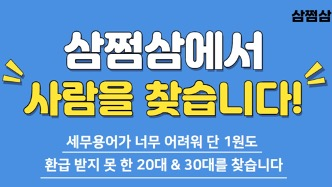

In [77]:
 from IPython.display import Image
 Image("./3.3.jpg")

# 1. 모듈

In [51]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline



# 전처리  
import numpy as np
import pandas as pd

# 시각화
from matplotlib.gridspec import GridSpec
from matplotlib import font_manager, rc
import missingno as msno
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import platform
import matplotlib

import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
plt.rcParams["font.family"] = 'AppleGothic'
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
plt.rcParams['axes.unicode_minus'] = False

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['AppleGothic']
10.0
# 설정 되어있는 폰트 글꼴
['AppleGothic']


# 2. 데이터

## 2-1. 데이터 불러오기

In [52]:
df = pd.read_csv("/Users/ijuyeong/onboarding_project/folk/team1_wanted_onboarding_2nd/Week2_이주영/Jobis_3o3.csv",encoding="utf-8")
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


## 2-2. 데이터 정보확인

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [54]:
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN


## 2-3. 데이터 결측값 확인

In [55]:
# 결측값 
df.isna().sum()

age              0
gender           0
year             0
refund           0
fee              0
has_paid         0
income_근로    59209
income_사업    21773
income_기타    74740
dtype: int64

### 결측값은 income에만 있다.
### income은 사용자의 소득이 누락된 것일 수도 있고, 소득이 없는 것일 수도 있기 때문에 결측치는 0으로 대체

## 2-4. 데이터 상관성 분석

/var/folders/44/crx333nn0lvgs_gnbz2k_qym0000gn/T/ipykernel_20337/1488717444.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation Matrix'}>

<Figure size 720x720 with 0 Axes>

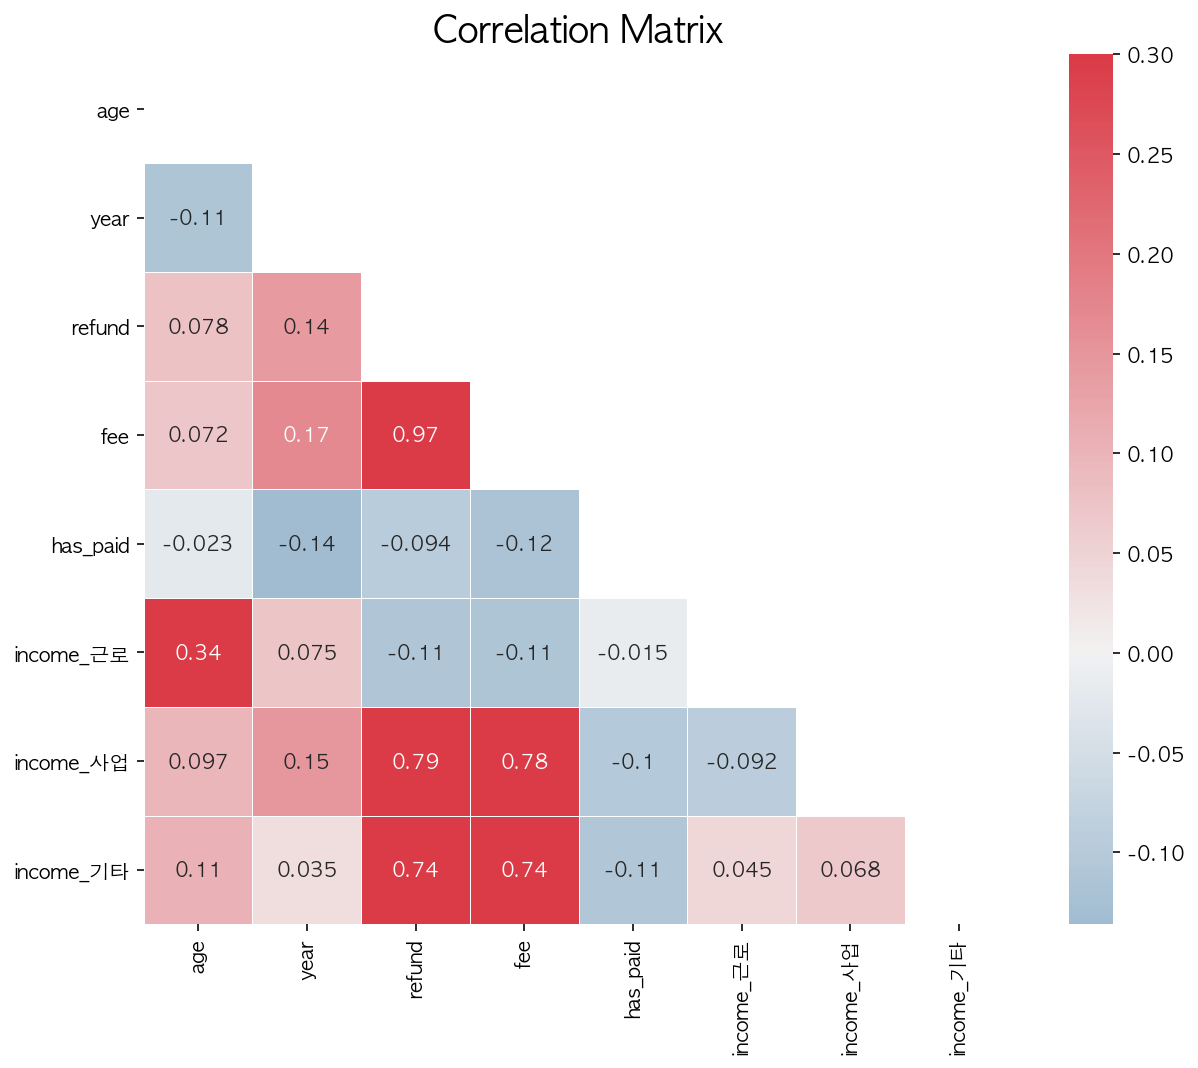

In [56]:
corr = df.corr()
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)

## 🌟 fee(수수료)는 refund와 income_사업, income_기타와 강한 양의 상관관계를 보인다
## 🌟 refund는 fee(수수료)와 income_사업, income_기타와 강한 양의 상관관계를 보인다
## 🌟 상관분석에서는 has_paid와 다른 요인간의 상관성이 없다..
### => has_paid가 boolean 타입이기 때문에 상관성이 없는 결과가 나오는 건아닐까?

In [57]:
# boolean to int
df["has_paid"] = df["has_paid"].astype("str")

In [58]:
df["has_paid"] = df["has_paid"].replace("True",1)
df["has_paid"] =  df["has_paid"].replace("False",0)
    

## 다시 상관성 분석!!

/var/folders/44/crx333nn0lvgs_gnbz2k_qym0000gn/T/ipykernel_20337/1488717444.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation Matrix'}>

<Figure size 720x720 with 0 Axes>

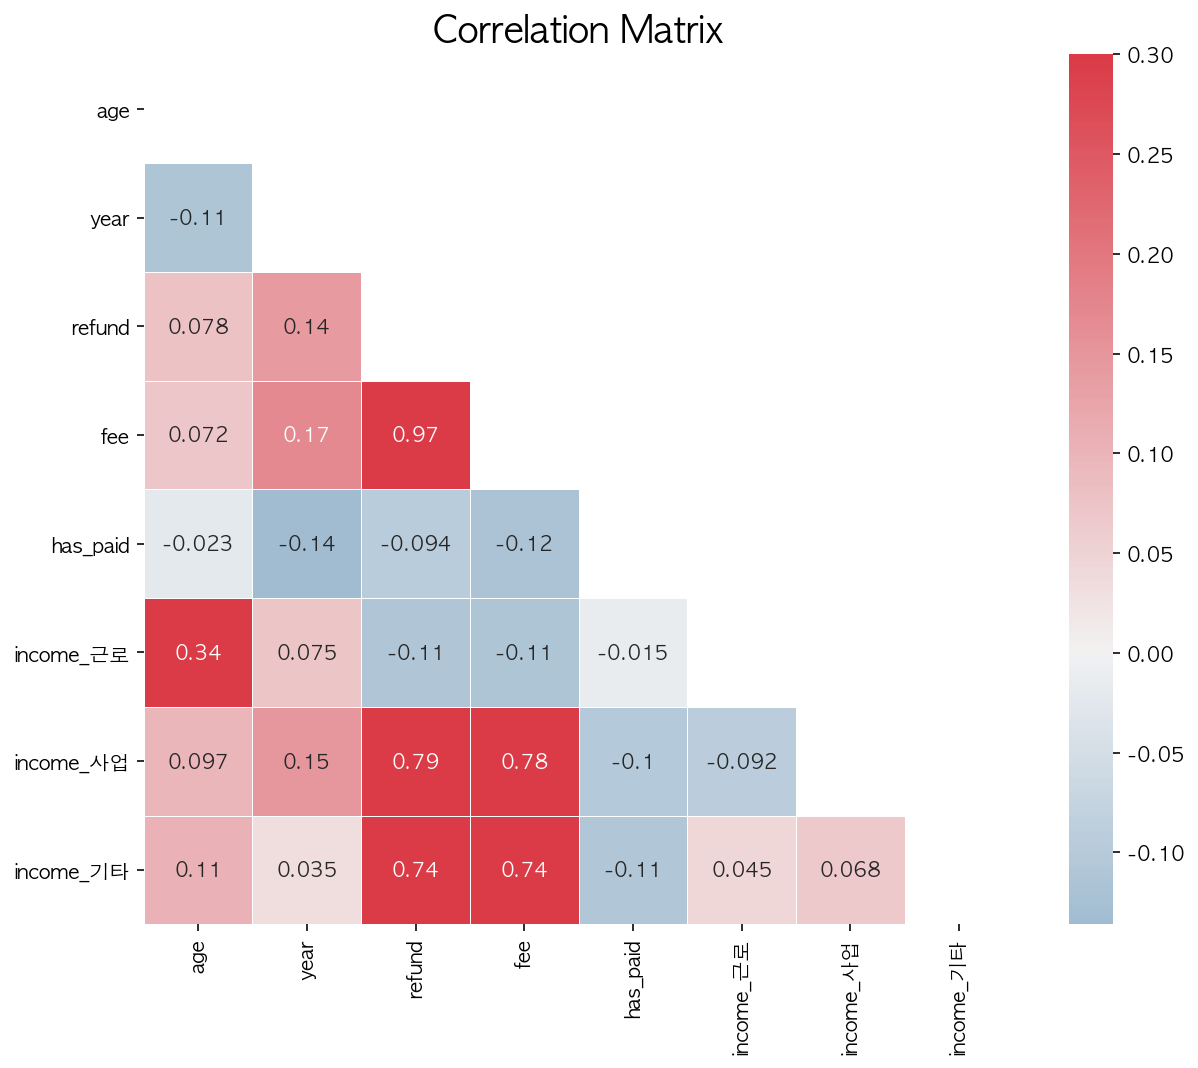

In [59]:
corr = df.corr()
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)

## => 근로 소득과 아주 약한 상관관계가 보이지만 뚜렷한 상관관계는 보이지 않는다!

## 예측 모델을 통해서 중요한 feature를 찾아보자!!
결제여부를 예측해보고 영향을 많이 주는 특성의 상관관계를 고려해 고객을 타겟팅할 수 있을 것 같다.

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# gender: 성별을 입력하지 않은 값 제거
# refund: 환급액 음수제거
# income: 결측값 0으로 대체, 평균으로 대체해야하나..?
df["fee/refund(%)"] = (df["fee"]/df["refund"])*100
df_drop = df.drop(df[(df['gender']=='-')|(df['refund']<0)].index)
# df[['income_근로','income_사업','income_기타']] = df[['income_근로','income_사업','income_기타']].fillna(0)
df_fill_0 = df_drop.copy()
df_fill_0[['income_근로','income_사업','income_기타']] = df_fill_0[['income_근로','income_사업','income_기타']].fillna(0)
target = 'has_paid'

train, test = train_test_split(df_fill_0, train_size=0.80, test_size=0.20, 
                              stratify=df_fill_0[target], random_state=2)

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

((63976, 10), (15994, 10), (19993, 10))

In [69]:
features = train.drop(columns=[target,"fee/refund(%)"]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

from sklearn.pipeline import Pipeline
pipe = make_pipeline(
    OneHotEncoder(use_cat_names = True), 
    StandardScaler(),                       
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)

#대부분 특성의 데이터 분포가 낮은값에 몰려있고 불균형하고 최대값 최소값 차이가 많이나서 정규화 표준화를 해주었다.
from sklearn.metrics import classification_report
# train 학습, 검증셋 정확도
pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, pipe.predict(X_val)))

pipe2 = Pipeline([
    ('preprocessing', make_pipeline(OneHotEncoder(), SimpleImputer(), StandardScaler())),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)) 
])


pipe2.fit(X_train, y_train)
print('검증 정확도: ', pipe2.score(X_val, y_val))

검증 정확도 0.6945729648618232
              precision    recall  f1-score   support

           0       0.58      0.47      0.52      5653
           1       0.74      0.82      0.78     10341

    accuracy                           0.69     15994
   macro avg       0.66      0.64      0.65     15994
weighted avg       0.68      0.69      0.69     15994

검증 정확도:  0.6800675253219958


In [70]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe2.named_steps['rf'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe2.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [71]:
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

pd.Series(permuter.feature_importances_, encoded_columns).sort_values()

gender_F    -0.003451
gender_M    -0.002801
refund       0.005840
age          0.006165
income_근로    0.007453
fee          0.008741
income_기타    0.017056
year         0.038152
income_사업    0.094498
dtype: float64

In [72]:
feature_names = encoded_columns.tolist()

# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0945 ± 0.0032,income_사업
0.0382 ± 0.0039,year
0.0171 ± 0.0034,income_기타
0.0087 ± 0.0039,fee
0.0075 ± 0.0046,income_근로
0.0062 ± 0.0031,age
0.0058 ± 0.0030,refund
-0.0028 ± 0.0022,gender_M
-0.0035 ± 0.0014,gender_F


income_사업, year, fee, income_기타, refund, age, income_근로, gender 순으로 중요도가 나왔고, 성별은 거의 무의미 하다.<br>

## 🤔 가설
### 1. refund가 적을 경우 수수료를 결제하지 않을 것이다. 
### 2. fee/refund(%)가 클 수록 수수료를 결제하지 않을 것이다. 
### 3. 나이가 어릴 수록 has_paid가 False일 경우가 클 것이다.
### 4. 보통 근로소득을 받을 경우 연말 정산을 통해 환급을 받기 때문에 서비스 사용이 적을 것이다.
### 5. fee가 적을수록 수수료를 결제할 것이다.


# 3. 데이터 전처리

## 3-1. 컬럼 생성

In [ ]:
# fee/refund(%) 컬럼 생성 
# 환급액 대비 수수료 
df["fee/refund(%)"] = (df["fee"]/df["refund"])*100
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%)
0,27.0,F,2019,5000.0,400.0,0,10001000.0,61000.0,NaN,8.000000
1,34.0,M,2018,100000.0,1700.0,1,18092000.0,NaN,1815000.0,1.700000
2,28.0,F,2017,289000.0,11500.0,0,NaN,1461000.0,NaN,3.979239
3,27.0,M,2019,410000.0,16200.0,0,NaN,2471000.0,NaN,3.951220
4,26.0,F,2016,114000.0,4300.0,1,0.0,689000.0,NaN,3.771930


## 3-2. 새 컬럼 포함 상관관계 분석

/var/folders/44/crx333nn0lvgs_gnbz2k_qym0000gn/T/ipykernel_20337/1488717444.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation Matrix'}>

<Figure size 720x720 with 0 Axes>

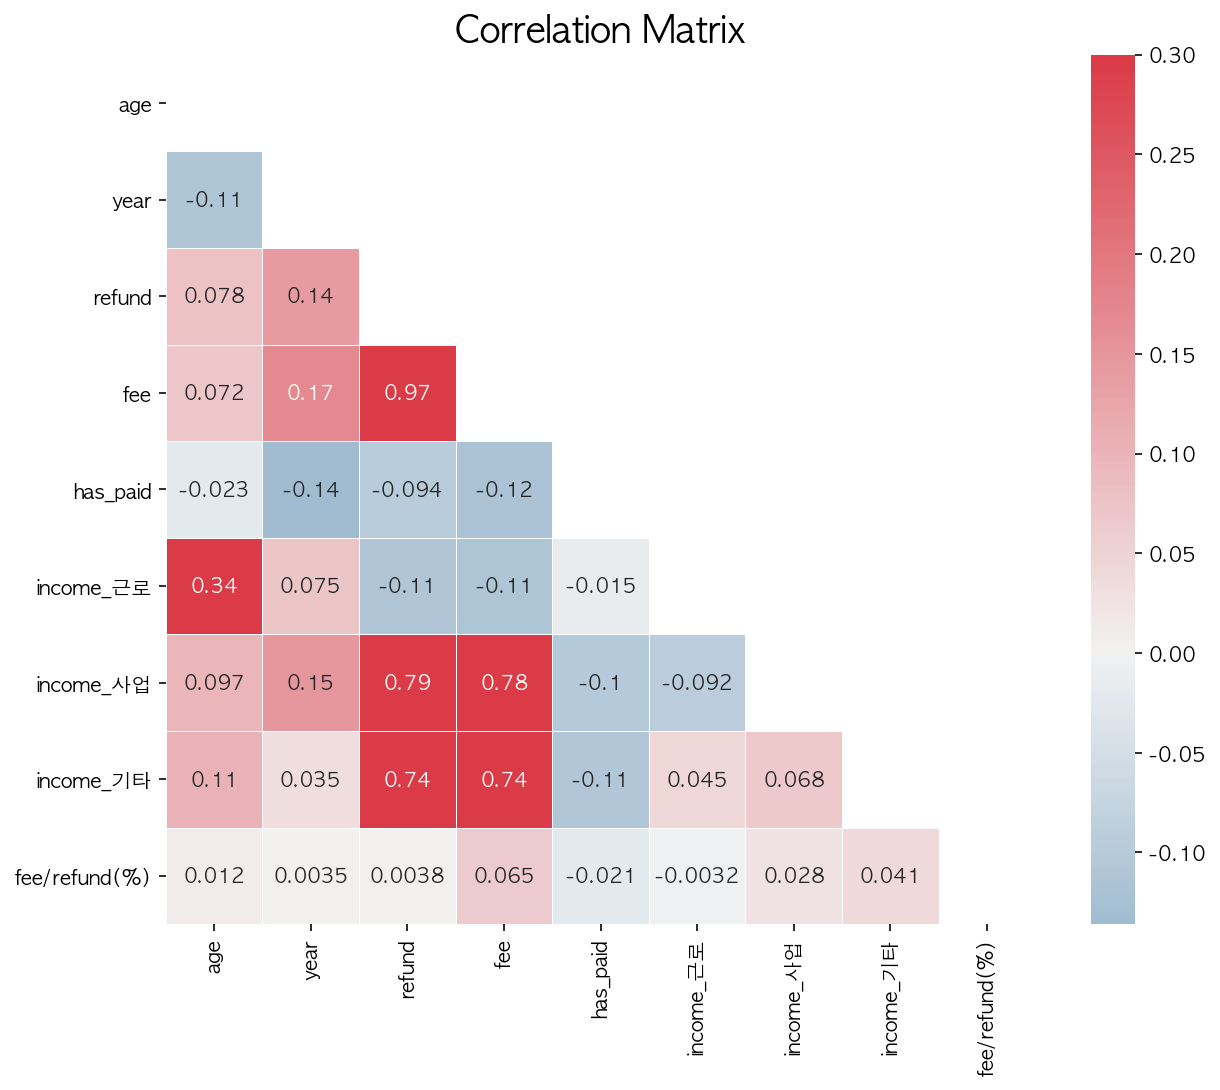

In [ ]:
corr = df.corr()
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)

## 3-3. 데이터 확인

In [ ]:
# 통계 - fee/refund(%) inf로 나타남... fillna로 0으로 바꿔줘야겠다.
df.describe()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%)
count,100000.00000,100000.000000,1.000000e+05,100000.000000,100000.00000,4.079100e+04,7.822700e+04,2.526000e+04,1.000000e+05
mean,29.00096,2018.111300,2.081422e+05,7247.641000,0.64643,6.432597e+06,1.511712e+06,6.362834e+05,NaN
std,7.76819,1.495812,3.071744e+05,11926.896979,0.47808,6.583716e+06,2.449810e+06,1.484947e+06,NaN
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,-inf
25%,24.00000,2017.000000,3.300000e+04,400.000000,0.00000,1.616000e+06,1.770000e+05,8.200000e+04,1.830986e+00
50%,27.00000,2018.000000,9.900000e+04,4300.000000,1.00000,4.507000e+06,6.190000e+05,2.130000e+05,3.333333e+00
75%,31.00000,2019.000000,2.540000e+05,8500.000000,1.00000,9.301000e+06,1.601000e+06,5.820000e+05,3.942308e+00
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.00000,1.823350e+08,3.993400e+07,6.281000e+07,inf


In [ ]:
# refund에 음수가 있어 음수 데이터 확인
df[df['refund']<0].count()

age          15
gender       15
year         15
refund       15
fee          15
has_paid     15
income_근로    13
income_사업    15
income_기타     4
dtype: int64

In [ ]:
# 음수 데이터 이상치로 판단하고 제거
df[df['refund']<0]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
10034,34.0,M,2015,-231000.0,8500.0,True,8989000.0,1714000.0,NaN
10624,25.0,F,2018,-7000.0,400.0,True,7508000.0,28000.0,NaN
22506,32.0,F,2019,-5000.0,400.0,False,7118000.0,259000.0,NaN
29515,41.0,F,2017,-10000.0,400.0,True,19718000.0,162000.0,128000.0
52648,26.0,F,2020,-397000.0,1300.0,False,8175000.0,247000.0,NaN
52858,34.0,M,2017,-2328000.0,400.0,False,16759000.0,28000.0,441000.0
54256,48.0,F,2018,-948000.0,3000.0,True,8157000.0,3975000.0,NaN
55168,28.0,F,2020,-1658000.0,1700.0,False,10509000.0,570000.0,NaN
57756,38.0,F,2017,-107000.0,4300.0,True,16619000.0,737000.0,NaN
68881,33.0,M,2016,-322000.0,400.0,True,NaN,57000.0,NaN


In [ ]:
# 0으로 바꿔주고 다시 raw 값 변경 필요
df = pd.read_csv("/Users/ijuyeong/onboarding_project/folk/team1_wanted_onboarding_2nd/Week2_이주영/Jobis_3o3.csv",encoding="utf-8")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


## 3-4. 데이터 처리

In [ ]:
df[df['refund']<0]
df["age"] = df["age"].astype("int64")
df["refund"] = df["refund"].astype("int64")
df["fee"] = df["fee"].astype("int64")
df = df.fillna(0)
df["fee/refund(%)"] = round((df["fee"]/df["refund"])*100,2)
df["fee/refund(%)"]  = df["fee/refund(%)"] .replace([np.inf, -np.inf], 0)
df["income_근로"] = df["income_근로"].astype("int64")
df["income_사업"] = df["income_사업"].astype("int64")
df["income_기타"] = df["income_기타"].astype("int64")

In [ ]:
df["has_paid"] = df["has_paid"].astype("str")
df["has_paid"] = df["has_paid"].replace("True",1)
df["has_paid"] = df["has_paid"].replace("False",0)


df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%)
0,27,F,2019,5000,400,0,10001000,61000,0,8.00
1,34,M,2018,100000,1700,1,18092000,0,1815000,1.70
2,28,F,2017,289000,11500,0,0,1461000,0,3.98
3,27,M,2019,410000,16200,0,0,2471000,0,3.95
4,26,F,2016,114000,4300,1,0,689000,0,3.77


In [ ]:
# 성별에 - 는 뭘까?
for i in range(len(df.columns)):
    print(df.columns[i],":",df[df.columns[i]].unique())

age : [27 34 28 26 39 40 23 54 22 25 42 37 48 33 44 31 30 20 24 60 32 35 29 36
 47 58 43 21 41 38 61 49 55 50 62 56 52 19 18 45 51 46 59 53 57 17 76 64
 65 66 69 71 67 72 63 70 16 15 77 68 79 78 74 81 73]
gender : ['F' 'M' '-']
year : [2019 2018 2017 2016 2015 2020]
refund : [   5000  100000  289000 ... 2545000 2280000 1591000]
fee : [   400   1700  11500  16200   4300  12800  73100    900   6400  29800
   9800   8500   7200  15700  17900   5100  18700  27200   9400  10200
  34400   3000   4700   6000  20800   2600   1300  23800   7700  27600
  15300  24200  12300  21700  45900  17000  42500   3800  28100   2100
   3400  18300  14000   8100   5500  26400  37000  37400  19100   6800
  11900  40800  36100  25900  26800  11100  16600  61600  24700  32700
  30200  40400  23400  14500  35300  33200  31000  10600  38700  31900
  21300  14900  19600  22100  13200   8900  31500  34000  49300  54000
  30600  13600  80400  28500  20400  43800  74800  37800  17400  36600
  45500  41200  32300 109

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   age            100000 non-null  int64  
 1   gender         100000 non-null  object 
 2   year           100000 non-null  int64  
 3   refund         100000 non-null  int64  
 4   fee            100000 non-null  int64  
 5   has_paid       100000 non-null  int64  
 6   income_근로      100000 non-null  int64  
 7   income_사업      100000 non-null  int64  
 8   income_기타      100000 non-null  int64  
 9   fee/refund(%)  100000 non-null  float64
dtypes: float64(1), int64(8), object(1)
memory usage: 7.6+ MB


In [ ]:
df.describe()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%)
count,100000.00000,100000.000000,1.000000e+05,100000.000000,100000.00000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,29.00096,2018.111300,2.081422e+05,7247.641000,0.64643,2.623921e+06,1.182567e+06,1.607252e+05,3.431284
std,7.76819,1.495812,3.071744e+05,11926.896979,0.47808,5.260655e+06,2.254789e+06,7.958761e+05,8.502851
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,-8.000000
25%,24.00000,2017.000000,3.300000e+04,400.000000,0.00000,0.000000e+00,3.100000e+04,0.000000e+00,1.830000
50%,27.00000,2018.000000,9.900000e+04,4300.000000,1.00000,0.000000e+00,3.280000e+05,0.000000e+00,3.330000
75%,31.00000,2019.000000,2.540000e+05,8500.000000,1.00000,2.994000e+06,1.235000e+06,2.000000e+03,3.940000
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.00000,1.823350e+08,3.993400e+07,6.281000e+07,1595.000000


# 4. 데이터 분석

## 4-1. fee&refund 분석

## 가설 1. refund가 적을 경우 수수료를 결제하지 않을 것이다. 
## 가설 2. fee/refund(%)가 클 수록 수수료를 결제하지 않을 것이다. 
## 가설 5. fee가 적을수록 수수료를 결제할 것이다.
<br/>

## ✅ 연도별로 예상환급액이 오른 만큼 수수료도 함께 올랐다.
## ✅ 예상환급액에 비해 수수료 상승률이 약 5% 더 올랐고, 그래프를 봤을 때, has_paid는 수수료 변동과 비슷한 추세를 보였다.
## A. refund가 적을 경우, 대체적으로 fee도 적다. fee가 적을 수록 수수료를 결제할 확률이 높아진다. 예상환급액 대비 수수료가 낮아야 수수료 결제를 많이 할 것이다.
## 🌟 Result (가설 1,2,5) : refund가 적을수록 fee가 적을 수록 수수료 결제 확률 높으며, 예상환급액 대비 수수료가 낮을 수록 수수료 결제 확률이 높아진다.

In [ ]:
print("수수료 상승률 : " , round((df[df["year"]==2020].fee.sum() - df[df["year"]==2015].fee.sum()) / df[df["year"]==2015].fee.sum(),2))
print("예상환급액 상승률 : " ,round((df[df["year"]==2020].refund.sum() - df[df["year"]==2015].refund.sum()) / df[df["year"]==2015].refund.sum(),2))

수수료 상승률 :  15.32
예상환급액 상승률 :  10.54


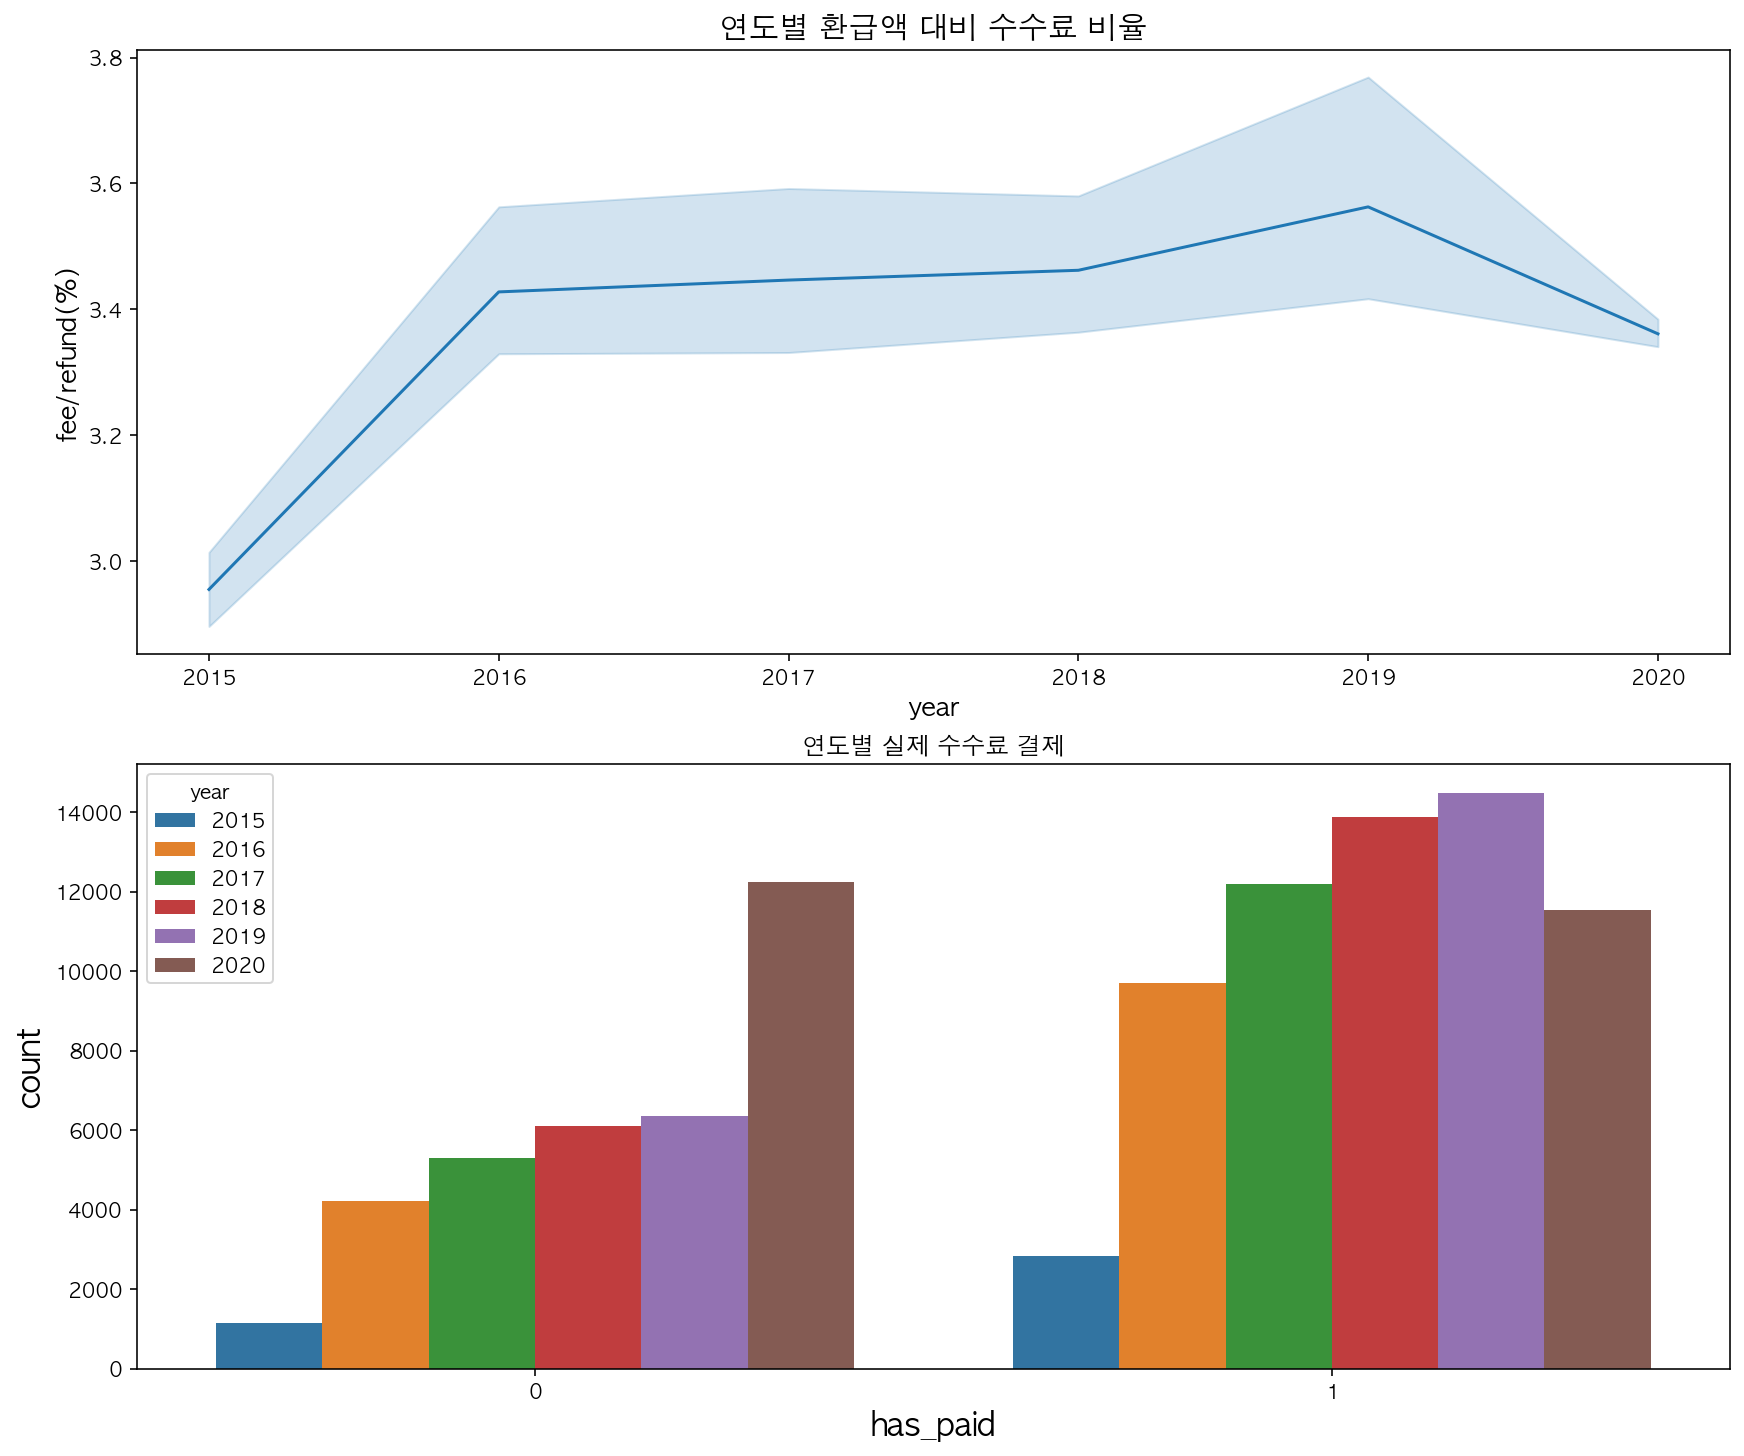

In [ ]:
fig = plt.figure(figsize=(12, 10),constrained_layout=True)
gs = GridSpec(2, 1, figure=fig)
ax1 = fig.add_subplot(gs[0 :-1])
ax2 = fig.add_subplot(gs[1 :,-1])

# 연도별 예상환급액
sns.lineplot(data=df.set_index("year")["fee/refund(%)"],ax=ax1)
ax1.set_title("연도별 환급액 대비 수수료 비율", fontsize=15)
ax1.set_xlabel("year",fontsize=13)
ax1.set_ylabel("fee/refund(%)",fontsize=13)

# 연도별 실제 수수료 결제
sns.countplot(x="has_paid",data=df,hue="year",ax=ax2)
ax2.set_ylabel("count", fontsize=16)
ax2.set_xlabel("has_paid", fontsize=16)
ax2.set_title("연도별 실제 수수료 결제")


plt.show()

## column에 따른 수수료 결제율 비교

Text(0.5, 1.0, '연도별 수수료')

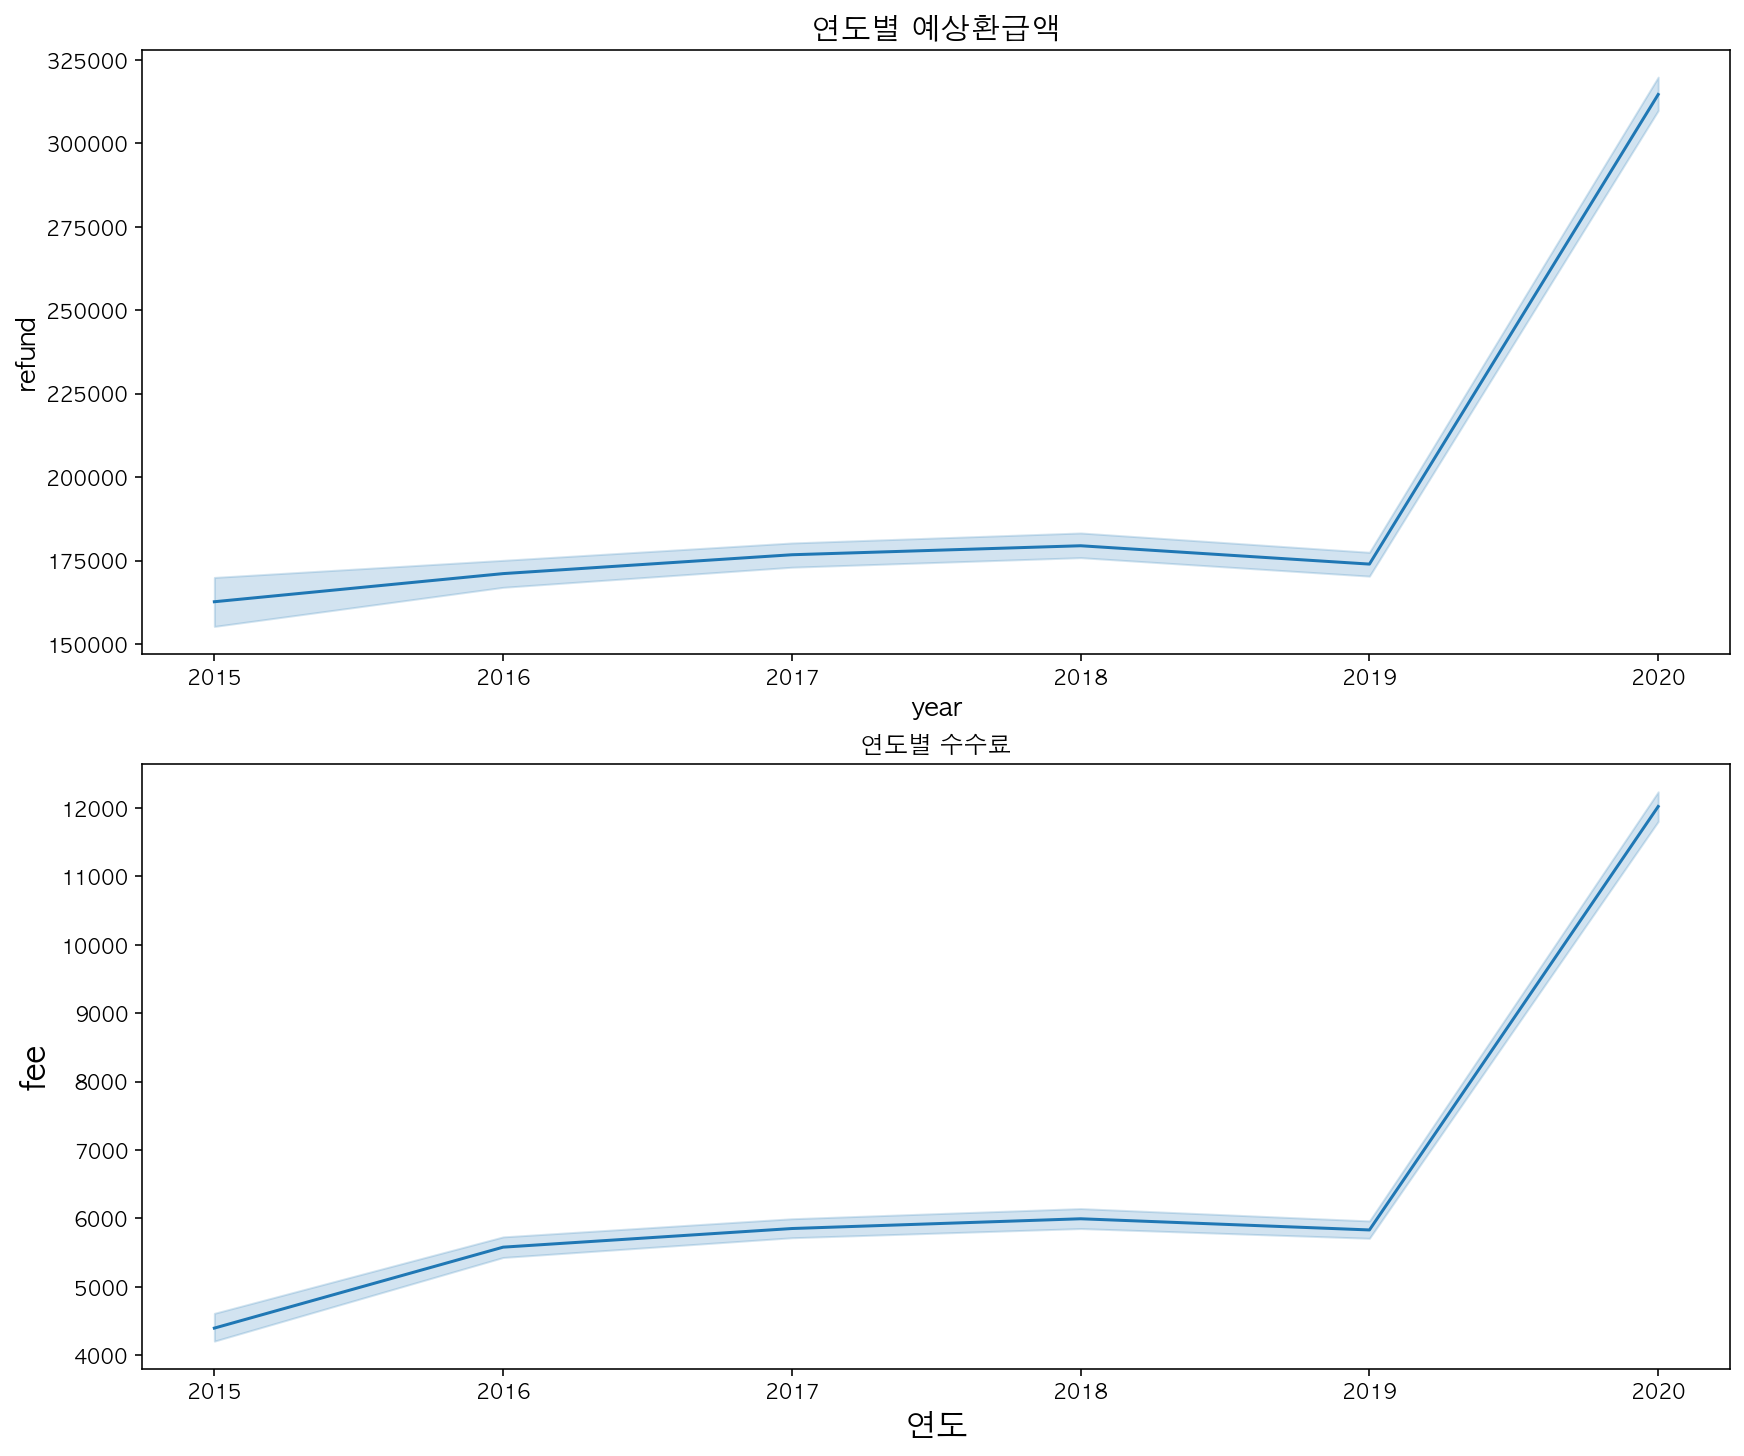

In [ ]:
fig = plt.figure(figsize=(12, 10),constrained_layout=True)
gs = GridSpec(2, 1, figure=fig)
ax1 = fig.add_subplot(gs[0 :-1])
ax2 = fig.add_subplot(gs[1 :,-1])

# 연도별 예상환급액
sns.lineplot(data=df.set_index("year")["refund"],ax=ax1)
ax1.set_title("연도별 예상환급액", fontsize=15)
ax1.set_xlabel("year",fontsize=13)
ax1.set_ylabel("refund",fontsize=13)

# 연도별 실제 수수료 결제
sns.lineplot(data=df.set_index("year")["fee"],ax=ax2)
ax2.set_ylabel("fee", fontsize=16)
ax2.set_xlabel("연도", fontsize=16)
ax2.set_title("연도별 수수료")


Text(0.5, 1.0, '예상환급액과 수수료')

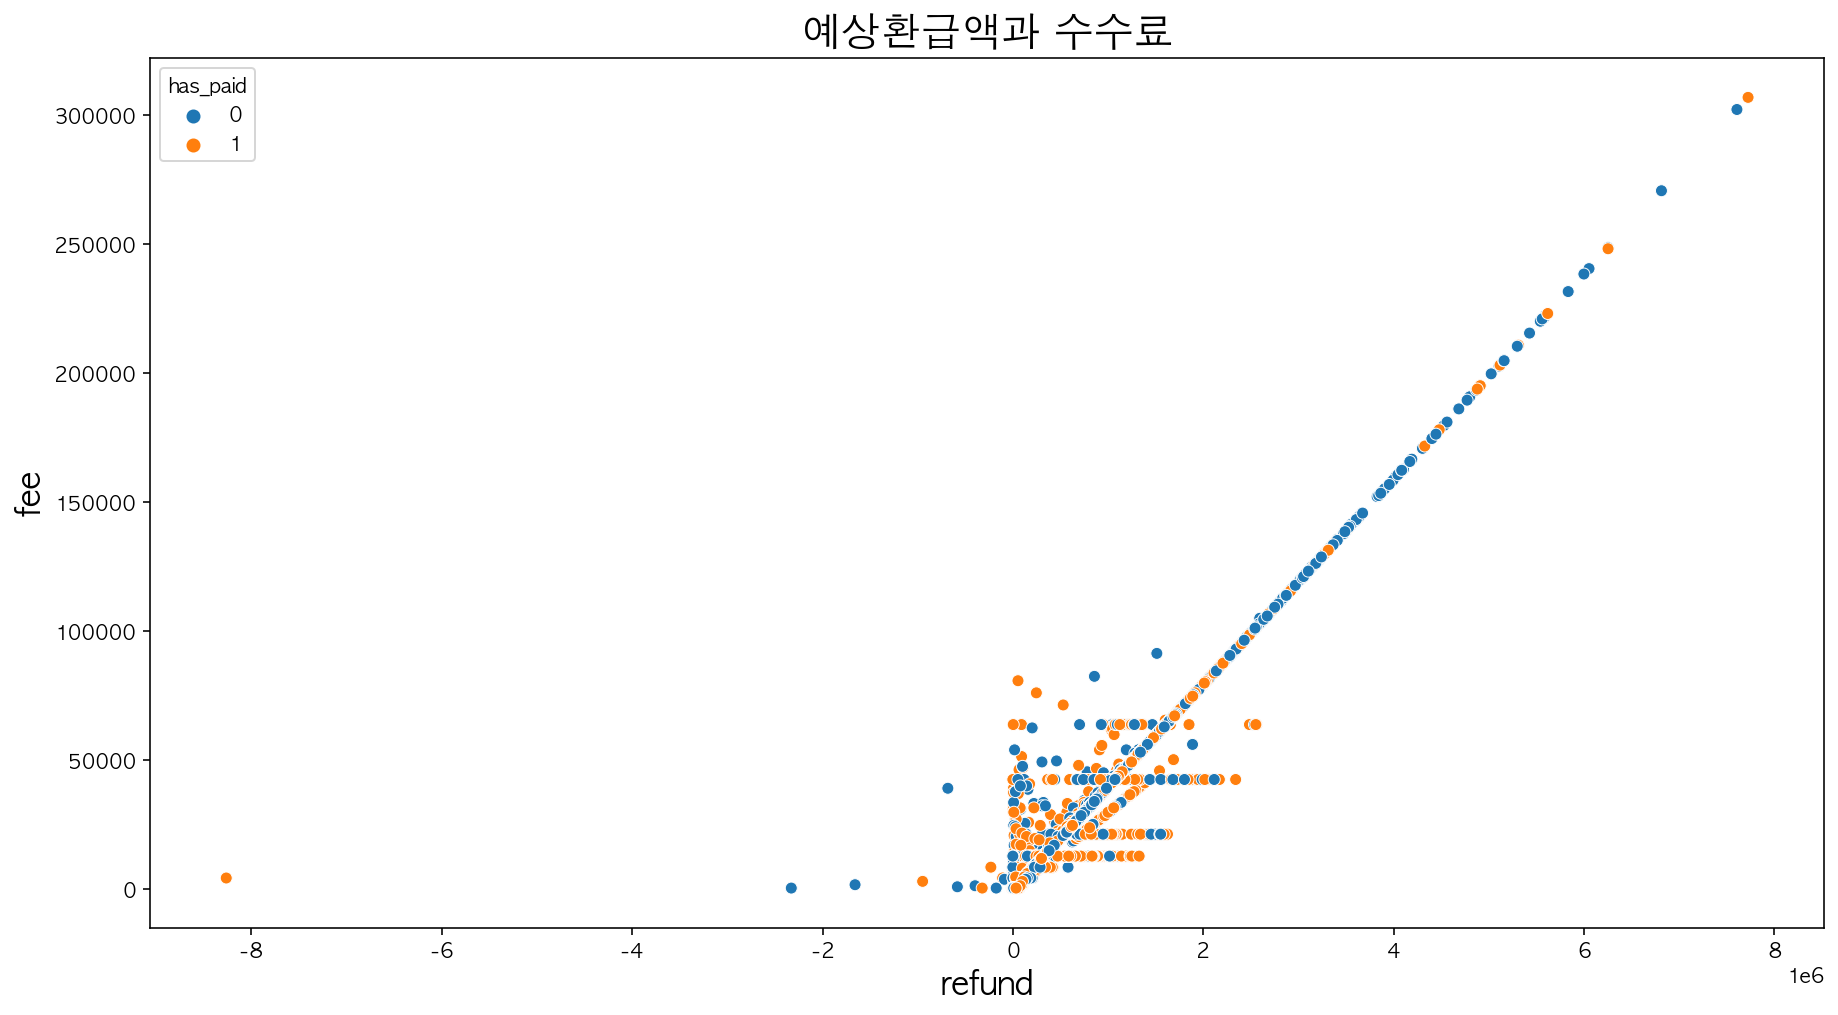

In [ ]:
# 연도별 실제 수수료 결제
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x="refund",y="fee",hue="has_paid",data=df)
plt.ylabel("fee", fontsize=16)
plt.xlabel("refund", fontsize=16)
plt.title("예상환급액과 수수료",fontsize=20)

## 4-2. age 분석

## 가설 3. 나이가 어릴 수록 has_paid가 False일 경우가 클 것이다.
## A 
## - 소비자 비중은 보통 20-30대에였으며, 적은 비율이였던 10,70,80대가 높은 비율로 수수료를 결제함
## - 사업 소득을 가지고 있는 소비자가 수수료 결제를 제일 많이 했고, 그중 23살이 가장 많이 했다.(23,24,25,26,27,28 순)

### 나이대 만들기

In [ ]:
df["나이대"] = df["age"]

In [ ]:
def age_range(x):
    if x <20 : 
        return 10
    elif x>=20 and x<30:
        return 20
    elif x>=30 and x<40:
        return 30
    elif x>=40 and x<50:
        return 40
    elif x>=50 and x<60:
        return 50
    elif x>=60 and x<70:
        return 60
    elif x>=70 and x<80:
        return 70
    else:
        return 80

In [ ]:
df["나이대"] = df.apply(lambda x: age_range(x.나이대),axis=1)

In [ ]:
df["나이대"].unique()

array([20, 30, 40, 50, 60, 10, 70, 80])

In [ ]:
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%),나이대
0,27,F,2019,5000,400,0,10001000,61000,0,8.00,20
1,34,M,2018,100000,1700,1,18092000,0,1815000,1.70,30
2,28,F,2017,289000,11500,0,0,1461000,0,3.98,20
3,27,M,2019,410000,16200,0,0,2471000,0,3.95,20
4,26,F,2016,114000,4300,1,0,689000,0,3.77,20


In [ ]:
df.columns

Index(['age', 'gender', 'year', 'refund', 'fee', 'has_paid', 'income_근로',
       'income_사업', 'income_기타', 'fee/refund(%)', '나이대'],
      dtype='object')

In [ ]:
def paid(feature):
    if feature!="has_paid":
        print(f"[{feature}에 따른 수수료 결제율]")
        df_feature = df[[feature,"has_paid"]].groupby(df[feature]).mean().sort_values(by="has_paid", ascending=False)
        print(df_feature)
        print("\n\n")
        

In [ ]:
# 나이대에 따른 수수료 결제율
paid(df.columns[10])

[나이대에 따른 수수료 결제율]
      나이대  has_paid
나이대                
80   80.0  1.000000
70   70.0  0.785714
10   10.0  0.692729
60   60.0  0.675565
20   20.0  0.653388
30   30.0  0.635605
50   50.0  0.617035
40   40.0  0.610124





## 4-3. income 분석

In [ ]:
df_feature = df[["나이대","has_paid","income_근로_tf","income_사업_tf","income_기타_tf"]].groupby(["나이대","income_근로_tf","income_사업_tf","income_기타_tf"], as_index=False).sum().sort_values(['나이대',"income_근로_tf","income_사업_tf","income_기타_tf"], ascending=False)
df_feature["has_paid_property(%)"] = df_feature["has_paid"] 
df_feature.head()

,나이대,income_근로_tf,income_사업_tf,income_기타_tf,has_paid,has_paid_property(%)
51,80,0,1,0,3,3
50,70,1,1,0,7,7
49,70,0,1,1,2,2
48,70,0,1,0,23,23
47,70,0,0,0,1,1


In [ ]:
df_feature["sum"] = 0
for i in range(len(df_feature)):
    if df_feature["나이대"][i] ==10:
        df_feature["sum"][i] = df_feature[df_feature["나이대"]==10].has_paid.sum()
    elif df_feature["나이대"][i] ==20:
        df_feature["sum"][i] = df_feature[df_feature["나이대"]==20].has_paid.sum()
    elif df_feature["나이대"][i] ==30:
        df_feature["sum"][i] = df_feature[df_feature["나이대"]==30].has_paid.sum()
    elif df_feature["나이대"][i] ==40:
        df_feature["sum"][i] = df_feature[df_feature["나이대"]==40].has_paid.sum()
    elif df_feature["나이대"][i] ==50:
        df_feature["sum"][i] = df_feature[df_feature["나이대"]==50].has_paid.sum()
    elif df_feature["나이대"][i] ==60:
        df_feature["sum"][i] = df_feature[df_feature["나이대"]==60].has_paid.sum()
    elif df_feature["나이대"][i] ==70:
        df_feature["sum"][i]= df_feature[df_feature["나이대"]==70].has_paid.sum()
    elif df_feature["나이대"][i] ==80:
        df_feature["sum"][i] = df_feature[df_feature["나이대"]==80].has_paid.sum()


In [ ]:
#000 : 없음 , 001 : 기타 , 010:사업, 011:사업 & 기타 , 100 : 근로, 101 : 근로 & 기타, 110 : 근로 & 사업, 111 : 근로 & 사업 & 기타(8))
# 같은 나이대 전체 수수료 결제 중 해당 class 수수료 결제
df_feature["has_paid_property(%)"] = (round(df_feature["has_paid_property(%)"]/df_feature["sum"]*100,2)).astype(str) +"%"
df_feature_1 = df_feature.copy()
df_feature_1["income_근로_tf"]= df_feature_1["income_근로_tf"].astype(str)
df_feature_1["income_사업_tf"]= df_feature_1["income_사업_tf"].astype(str)
df_feature_1["income_기타_tf"] = df_feature_1["income_기타_tf"].astype(str)
df_feature_1["income"] = df_feature_1["income_근로_tf"] + df_feature_1["income_사업_tf"]+ df_feature_1["income_기타_tf"]
df_feature_1[["나이대","income","has_paid_property(%)"]]

,나이대,income,has_paid_property(%)
51,80,010,100.0%
50,70,110,21.21%
49,70,011,6.06%
48,70,010,69.7%
47,70,000,3.03%
46,60,111,4.56%
45,60,110,28.57%
44,60,101,3.95%
43,60,100,0.3%
42,60,011,3.65%


In [ ]:
#000 : 없음 , 001 : 기타 , 010:사업, 011:사업 & 기타 , 100 : 근로, 101 : 근로 & 기타, 110 : 근로 & 사업, 111 : 근로 & 사업 & 기타(8))
df_feature_1["소득"] = df_feature_1["income"]
df_feature_1["소득"].replace("000","없음", inplace=True)
df_feature_1["소득"].replace("001","기타", inplace=True)
df_feature_1["소득"].replace("010","사업", inplace=True)
df_feature_1["소득"].replace("011","사업 & 기타", inplace=True)
df_feature_1["소득"].replace("100","근로", inplace=True)
df_feature_1["소득"].replace("101","근로 & 기타", inplace=True)
df_feature_1["소득"].replace("110","근로 & 사업", inplace=True)
df_feature_1["소득"].replace("111","근로 & 사업 & 기타", inplace=True)

In [ ]:
df_feature_1[["나이대","income","소득","has_paid_property(%)"]]

,나이대,income,소득,has_paid_property(%)
51,80,010,사업,100.0%
50,70,110,근로 & 사업,21.21%
49,70,011,사업 & 기타,6.06%
48,70,010,사업,69.7%
47,70,000,없음,3.03%
46,60,111,근로 & 사업 & 기타,4.56%
45,60,110,근로 & 사업,28.57%
44,60,101,근로 & 기타,3.95%
43,60,100,근로,0.3%
42,60,011,사업 & 기타,3.65%


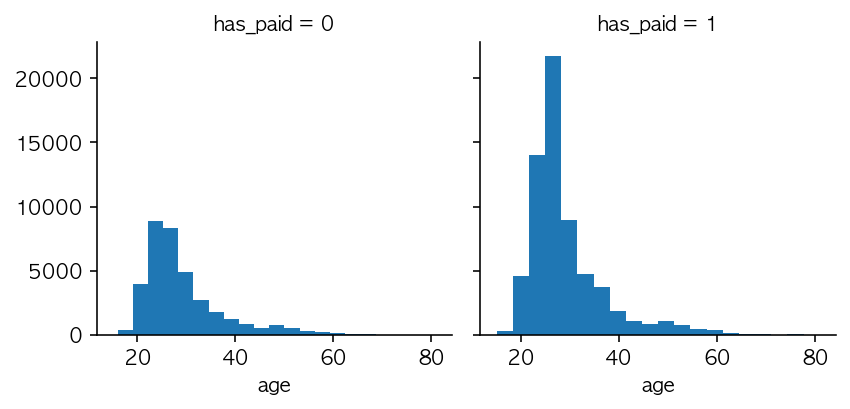

In [78]:
# 열(col)을 수수료 결제 여부로 나눔
g = sns.FacetGrid(df, col='has_paid')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, 'age', bins=20)

## ➡️ 삼쩜삼의 주 고객 타켓인 20-30대를 세분화해서 보자

In [ ]:
age_20 = df["나이대"]==20
age_30 = df["나이대"]==30
df_2030 = df[age_20 | age_30]

In [ ]:
df_2030.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%),나이대,income_근로_tf,income_사업_tf,income_기타_tf
0,27,F,2019,5000,400,0,10001000,61000,0,8.00,20,1,1,0
1,34,M,2018,100000,1700,1,18092000,0,1815000,1.70,30,1,0,1
2,28,F,2017,289000,11500,0,0,1461000,0,3.98,20,0,1,0
3,27,M,2019,410000,16200,0,0,2471000,0,3.95,20,0,1,0
4,26,F,2016,114000,4300,1,0,689000,0,3.77,20,0,1,0


In [ ]:
df_f_2030 = df_2030[["age","has_paid","income_근로_tf","income_사업_tf","income_기타_tf"]].groupby(["age","income_근로_tf","income_사업_tf","income_기타_tf"], as_index=False).sum().sort_values(['age',"income_근로_tf","income_사업_tf","income_기타_tf"], ascending=False)
df_f_2030["has_paid_property(%)"] = df_f_2030["has_paid"] 
df_f_2030.head()

,age,income_근로_tf,income_사업_tf,income_기타_tf,has_paid,has_paid_property(%)
157,39,1,1,1,98,98
156,39,1,1,0,184,184
155,39,1,0,1,98,98
154,39,1,0,0,2,2
153,39,0,1,1,35,35


In [ ]:
df_f_2030["sum"] = 0
a = 20
for i in range(len(df_f_2030["age"].unique())):

    for j in range(len(df_f_2030)):
        if df_f_2030["age"][j] ==a:
            df_f_2030["sum"][j] = df_f_2030[df_f_2030["age"]==a].has_paid.sum()
    a+=1

In [ ]:
df_f_2030.head()

,age,income_근로_tf,income_사업_tf,income_기타_tf,has_paid,has_paid_property(%),sum
157,39,1,1,1,98,98,715
156,39,1,1,0,184,184,715
155,39,1,0,1,98,98,715
154,39,1,0,0,2,2,715
153,39,0,1,1,35,35,715


In [ ]:
# 같은 나이대 전체 수수료 결제 중 해당 class 수수료 결제
df_f_2030["has_paid_property(%)"] = (round(df_f_2030["has_paid_property(%)"]/df_f_2030["sum"]*100,2)).astype(str) +"%"
df_f_2030["income_근로_tf"]= df_f_2030["income_근로_tf"].astype(str)
df_f_2030["income_사업_tf"]= df_f_2030["income_사업_tf"].astype(str)
df_f_2030["income_기타_tf"] = df_f_2030["income_기타_tf"].astype(str)
df_f_2030["income"] = df_f_2030["income_근로_tf"] + df_f_2030["income_사업_tf"]+ df_f_2030["income_기타_tf"]
df_f_2030

,age,income_근로_tf,income_사업_tf,income_기타_tf,has_paid,has_paid_property(%),sum,income
157,39,1,1,1,98,13.71%,715,111
156,39,1,1,0,184,25.73%,715,110
155,39,1,0,1,98,13.71%,715,101
154,39,1,0,0,2,0.28%,715,100
153,39,0,1,1,35,4.9%,715,011
...,...,...,...,...,...,...,...,...
4,20,1,0,1,24,1.58%,1517,101
3,20,0,1,1,75,4.94%,1517,011
2,20,0,1,0,963,63.48%,1517,010
1,20,0,0,1,120,7.91%,1517,001


In [ ]:
df_f_2030["소득"] = df_f_2030["income"]
df_f_2030["소득"].replace("000","없음", inplace=True)
df_f_2030["소득"].replace("001","기타", inplace=True)
df_f_2030["소득"].replace("010","사업", inplace=True)
df_f_2030["소득"].replace("011","사업 & 기타", inplace=True)
df_f_2030["소득"].replace("100","근로", inplace=True)
df_f_2030["소득"].replace("101","근로 & 기타", inplace=True)
df_f_2030["소득"].replace("110","근로 & 사업", inplace=True)
df_f_2030["소득"].replace("111","근로 & 사업 & 기타", inplace=True)

In [ ]:
for i in range(len(df_f_2030["age"].unique())):
    df_3 = df_f_2030[df_f_2030["age"]==df_f_2030["age"].unique()[i]]
    print(df_3[["age","income","소득","has_paid_property(%)"]].to_string(),end="\n")

     age income            소득 has_paid_property(%)
157   39    111  근로 & 사업 & 기타               13.71%
156   39    110       근로 & 사업               25.73%
155   39    101       근로 & 기타               13.71%
154   39    100            근로                0.28%
153   39    011       사업 & 기타                 4.9%
152   39    010            사업               38.04%
151   39    001            기타                1.82%
150   39    000            없음                1.82%
     age income            소득 has_paid_property(%)
149   38    111  근로 & 사업 & 기타               12.56%
148   38    110       근로 & 사업               28.17%
147   38    101       근로 & 기타               13.45%
146   38    100            근로                0.38%
145   38    011       사업 & 기타                4.31%
144   38    010            사업               35.28%
143   38    001            기타                 3.3%
142   38    000            없음                2.54%
     age income            소득 has_paid_property(%)
141   37    111  근로 & 사업 & 기타  

In [ ]:
# 25살 소비자가 수수료 결제율이 가장 높았다. 23-28 수수료 결제율 4000 건 이상
df_f_2030.groupby("age").sum()

,has_paid,sum
age,,
20,1517,10619
21,2432,19456
22,3540,24780
23,4815,38520
24,5696,45568
25,6106,48848
26,5664,45312
27,5271,42168
28,4732,37856


In [ ]:
# 사업 소득을 가지고 있는 소비자가 수수료 결제를 제일 많이 했고, 그중 23살이 가장 많이 했다.
import warnings
warnings.filterwarnings( 'ignore' )
age_23 = df_f_2030["age"]==23
age_24 = df_f_2030["age"]==24
age_25 = df_f_2030["age"]==25
age_26 = df_f_2030["age"]==26
age_27 = df_f_2030["age"]==27
age_28 = df_f_2030["age"]==28
df_f_23_28 = df_f_2030[age_23|age_24|age_25|age_26|age_27|age_28]
df_f_23_28['has_paid_property(%)'] = df_f_23_28["has_paid_property(%)"].apply(lambda x: x[:-1]).astype("float")
df_f_23_28[["age","income","소득","has_paid_property(%)"]].sort_values(["has_paid_property(%)"],ascending=[False])

,age,income,소득,has_paid_property(%)
24,23,010,사업,50.22
32,24,010,사업,47.75
40,25,010,사업,43.53
48,26,010,사업,41.58
56,27,010,사업,36.14
64,28,010,사업,35.69
68,28,110,근로 & 사업,35.02
60,27,110,근로 & 사업,34.87
52,26,110,근로 & 사업,30.63
44,25,110,근로 & 사업,28.56


## 가설 4. 보통 근로소득을 받을 경우 연말 정산을 통해 환급을 받기 때문에 서비스 사용이 적을 것이다.
## A . 
### 소득이 없는데 왜 수수료를 결제 했지???(000) 
### 근로 소득만 있는 소비자는 서비스 접속을 거의 하지 않는다.(100:98,101:6992,111:5670)
### 사업소득이 있는 소비자의 서비스 접속은 많은 편이다.(010:38432,011:6936,110:27132,111:5670)
### 보통 사업소득이 있는 소비자의 결제율이 높다.(010:0.7,011:0.7,110:0.71,111:0.72)

## 🌟따라서 근로소득을 받는 소비자보다 사업소득을 받는 소비자가 서비스 접속을 많이하고 수수료 결제율이 높다.

### 간단하게 근로, 사업 , 기타로 구분지어서 보자

In [ ]:
 def TF(x):
    if x==0:
        return 0
    else:
        return 1

In [ ]:
df["income_근로_tf"] =  df.apply(lambda x: TF(x.income_근로),axis=1)
df["income_사업_tf"] =  df.apply(lambda x: TF(x.income_사업),axis=1)
df["income_기타_tf"] =  df.apply(lambda x: TF(x.income_기타),axis=1)

In [ ]:
# income_수입에 따른 수수료 결제율(0: 수입 없음, 1: 수입 있음)
# income_근로, income_기타에 비해 income_사업의 수수료 결제율이 현저하게 높았다.
paid(df.columns[11])
paid(df.columns[12])
paid(df.columns[13])

[income_근로_tf에 따른 수수료 결제율]
              income_근로_tf  has_paid
income_근로_tf                        
1                      1.0  0.699514
0                      0.0  0.611200



[income_사업_tf에 따른 수수료 결제율]
              income_사업_tf  has_paid
income_사업_tf                        
1                      1.0  0.709339
0                      0.0  0.421164



[income_기타_tf에 따른 수수료 결제율]
              income_기타_tf  has_paid
income_기타_tf                        
1                      1.0  0.660362
0                      0.0  0.641758





## 👉 더 자세하게 구분해보자
### (000 : 없음 , 001 : 기타 , 010:사업, 011:사업 & 기타 , 100 : 근로, 101 : 근로 & 기타, 110 : 근로 & 사업, 111 : 근로 & 사업 & 기타(8))


In [ ]:
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%),나이대,income_근로_tf,income_사업_tf,income_기타_tf
0,27,F,2019,5000,400,0,10001000,61000,0,8.00,20,1,1,0
1,34,M,2018,100000,1700,1,18092000,0,1815000,1.70,30,1,0,1
2,28,F,2017,289000,11500,0,0,1461000,0,3.98,20,0,1,0
3,27,M,2019,410000,16200,0,0,2471000,0,3.95,20,0,1,0
4,26,F,2016,114000,4300,1,0,689000,0,3.77,20,0,1,0


In [ ]:
df1 = df.copy()
df1["income_근로_tf"]= df1["income_근로_tf"].astype(str)
df1["income_사업_tf"]= df1["income_사업_tf"].astype(str)
df1["income_기타_tf"] = df1["income_기타_tf"].astype(str)
df1["income"] = df1["income_근로_tf"] + df1["income_사업_tf"]+ df1["income_기타_tf"]
df1

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%),나이대,income_근로_tf,income_사업_tf,income_기타_tf,income
0,27,F,2019,5000,400,0,10001000,61000,0,8.00,20,1,1,0,110
1,34,M,2018,100000,1700,1,18092000,0,1815000,1.70,30,1,0,1,101
2,28,F,2017,289000,11500,0,0,1461000,0,3.98,20,0,1,0,010
3,27,M,2019,410000,16200,0,0,2471000,0,3.95,20,0,1,0,010
4,26,F,2016,114000,4300,1,0,689000,0,3.77,20,0,1,0,010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27,F,2019,301000,11900,1,0,0,680000,3.95,20,0,0,1,001
99996,62,F,2019,77000,1300,1,0,463000,0,1.69,60,0,1,0,010
99997,24,M,2020,9000,400,0,7923000,54000,0,4.44,20,1,1,0,110
99998,24,M,2019,34000,400,1,0,204000,0,1.18,20,0,1,0,010


Text(0.5, 0, 'income')

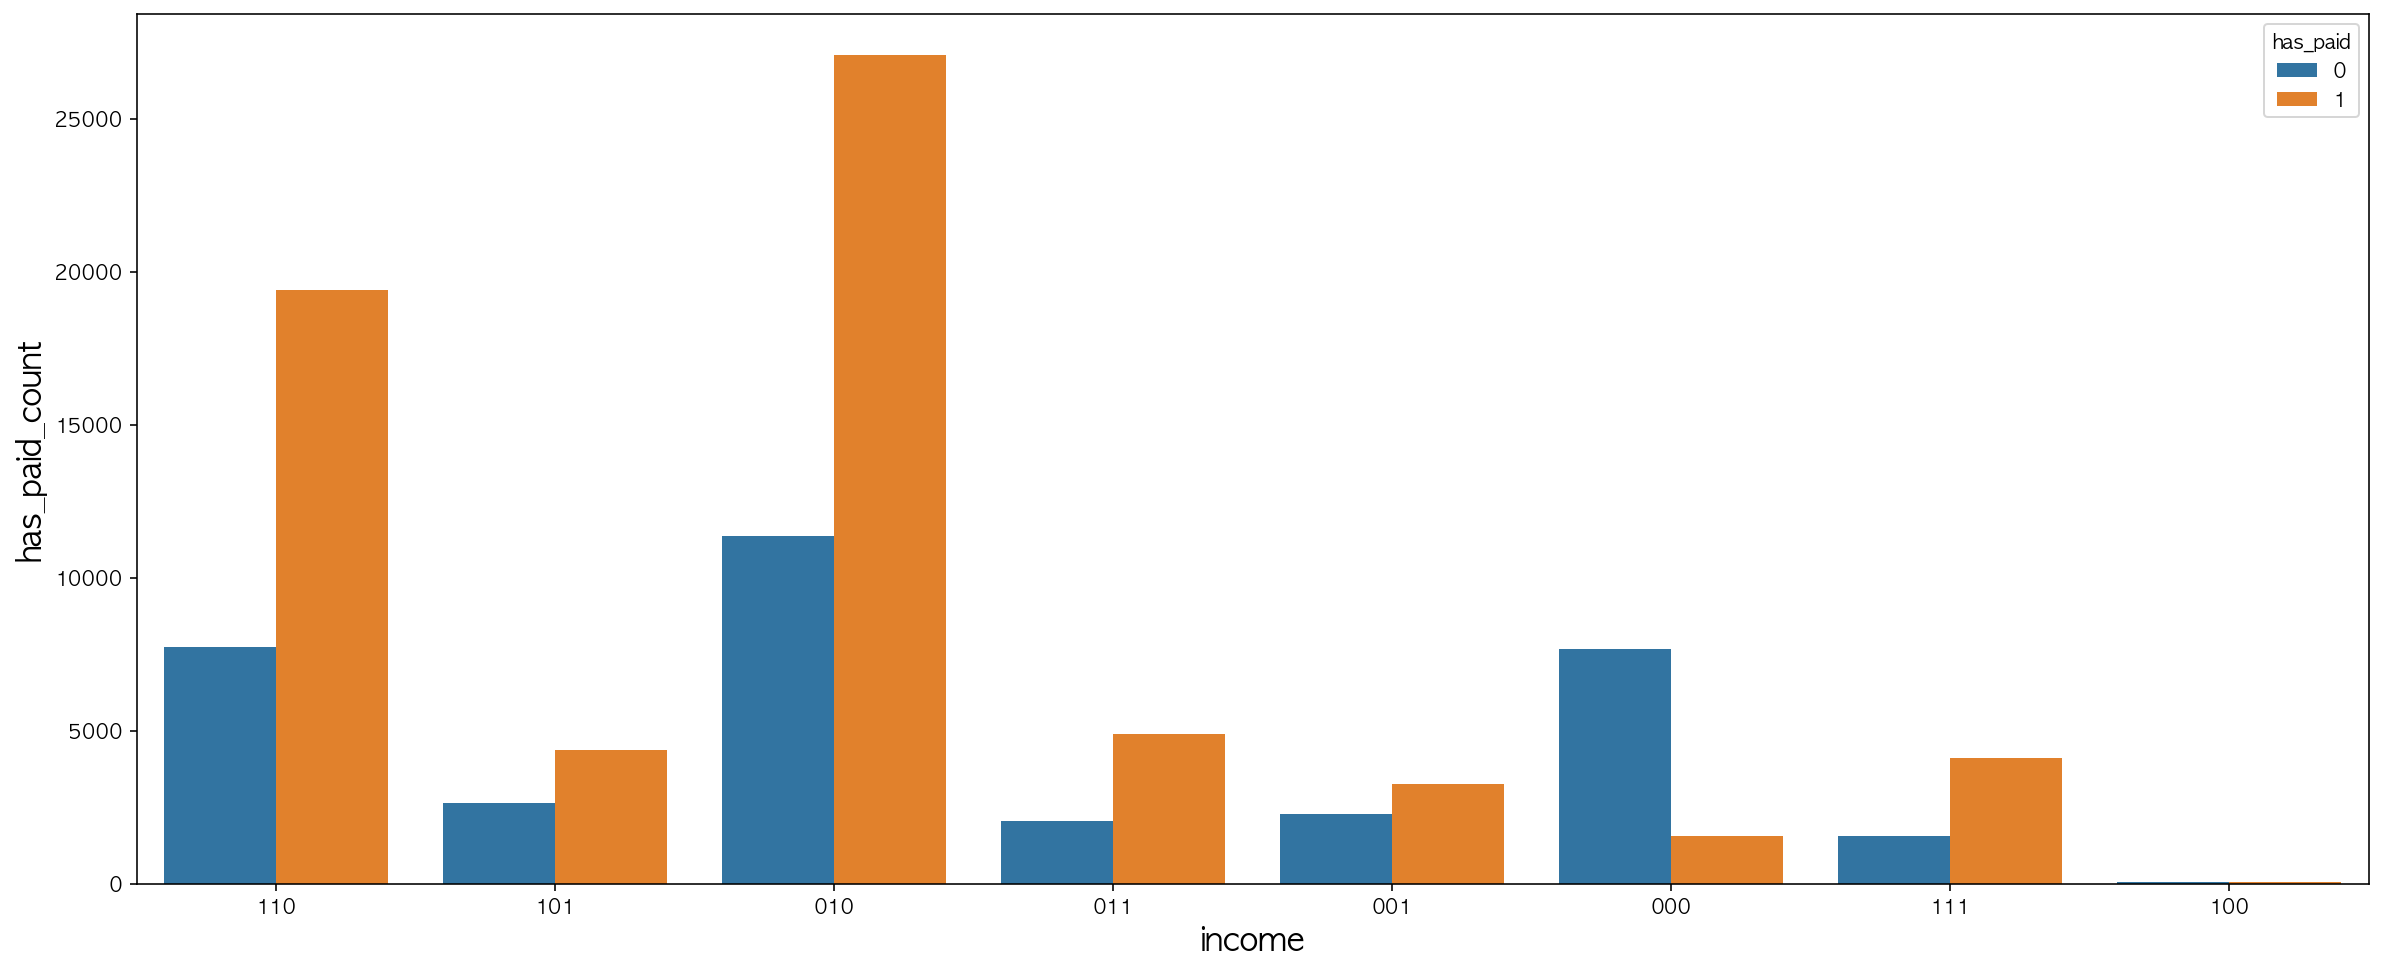

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.countplot(x="income",data=df1,hue="has_paid")
plt.ylabel("has_paid_count", fontsize=16)
plt.xlabel("income", fontsize=16)

In [ ]:
def has_paid_property(x):
    df2 = df1[df1["has_paid"]==1]
    df2 = df2[df2["income"]==x]
    df3 = df1[df1["has_paid"]==0]
    df3 = df3[df3["income"]==x]
    print("-"*5,f"[{x}]","-"*5)
    print(f"{x}의 총 수수료 결제 수 : ", round(df2.has_paid.count()+df3.has_paid.count(),2))
    print(f"{x}의 수수료 결제 비율 : ", round(df2.has_paid.count()/(df2.has_paid.count()+df3.has_paid.count()),2))


In [ ]:
# 000 : 없음 , 001 : 기타 , 010:사업, 011:사업 & 기타 , 100 : 근로, 101 : 근로 & 기타, 110 : 근로 & 사업, 111 : 근로 & 사업 & 기타(8)
for i in range(len(df1["income"].unique())):
    has_paid_property(df1["income"].unique()[i])

----- [110] -----
110의 총 수수료 결제 수 :  27132
110의 수수료 결제 비율 :  0.71
----- [101] -----
101의 총 수수료 결제 수 :  6992
101의 수수료 결제 비율 :  0.62
----- [010] -----
010의 총 수수료 결제 수 :  38432
010의 수수료 결제 비율 :  0.7
----- [011] -----
011의 총 수수료 결제 수 :  6936
011의 수수료 결제 비율 :  0.7
----- [001] -----
001의 총 수수료 결제 수 :  5514
001의 수수료 결제 비율 :  0.59
----- [000] -----
000의 총 수수료 결제 수 :  9226
000의 수수료 결제 비율 :  0.17
----- [111] -----
111의 총 수수료 결제 수 :  5670
111의 수수료 결제 비율 :  0.72
----- [100] -----
100의 총 수수료 결제 수 :  98
100의 수수료 결제 비율 :  0.53


## Result 
### (000 : 없음 , 001 : 기타 , 010:사업, 011:사업 & 기타 , 100 : 근로, 101 : 근로 & 기타, 110 : 근로 & 사업, 111 : 근로 & 사업 & 기타(8))
### 소득이 없는데 왜 수수료를 결제 했지???(000) 
### 근로 소득만 있는 소비자는 서비스 접속을 거의 하지 않는다.(100:98,101:6992,111:5670)
### 사업소득이 있는 소비자의 서비스 접속은 많은 편이다.(010:38432,011:6936,110:27132,111:5670)
### 보통 사업소득이 있는 소비자의 결제율이 높다.(010:0.7,011:0.7,110:0.71,111:0.72)

## 🌟따라서 근로소득을 받는 소비자보다 사업소득을 받는 소비자가 서비스 접속을 많이하고 수수료 결제율이 높다.

# ❗️논점의 답❗️

## 아래의 질문에 나름의 방식으로 답을 찾아주세요.
(정답은 없습니다. 문제를 정의하고, 해답에 이르게 된 과정과 그 해석을 잘 설득/설명해 주시는 것이 중요합니다.)

- 고객의 결제여부에 영향을 미치는 요인들은 무엇인가요? 
- 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요?

## 고객의 결제 여부에 영향을 미치는 요인
    1. 환급액 대비 수수료의 비율
        - 2020년 지불비율이 갑자기 나빠진 이유로 환급액 증가율 대비 수수료 증가율이 너무 크기 때문이다.
        - 수수료가 많을수록 결제를 꺼리는 경향이 있다.
        - 실제 서비스를 이용해보니 수수료를 선지불하고 환급은 몇 주 뒤에 받는 형식이기에 부담이 크다. 
        - 수수료가 클수록 직접 신고를 하는 수고도 감수하는 후기가 많다.
    2. 연령 - 사업소득을 포함하는 소비자가 많이 있는지에 따라, 사업 소득이 많을수록 수수료 결제 비율이 크다
    그중 23살이 가장 많이 했다.(23,24,25,26,27,28 순)

## 고객의 수수료 결제금액의 합을 높이기 위해서는 어떻게 해야 할까요?
    1. 환급액 대비 수수료를 줄여 전체 소비자를 늘리는 방법(단기적인 수수료 결제금액의 합은 오르지 않을것으로 생각, 추후 장기적으로 aquestion이 늘어 수수료 합이 늘어날 것을 기대)
    2. 환급액 대비 수수료를 늘려 현재 소비자에게서 수수료를 많이 받는 방법(retention 감소 우려)
    3. 선결제 시스템을 바꿔야함.
    4. 환급액이 실제와 다르게 나왔을 때 측정된 수수료도 달라져야함


## ✻ 추가 : 성별 컬럼도 한번 보자
## 유의미한 차이는 없다

In [ ]:
paid(df.columns[1])

[gender에 따른 수수료 결제율]
        has_paid
gender          
M       0.658755
F       0.634068
-       0.181818





Text(0.5, 0, '수수료')

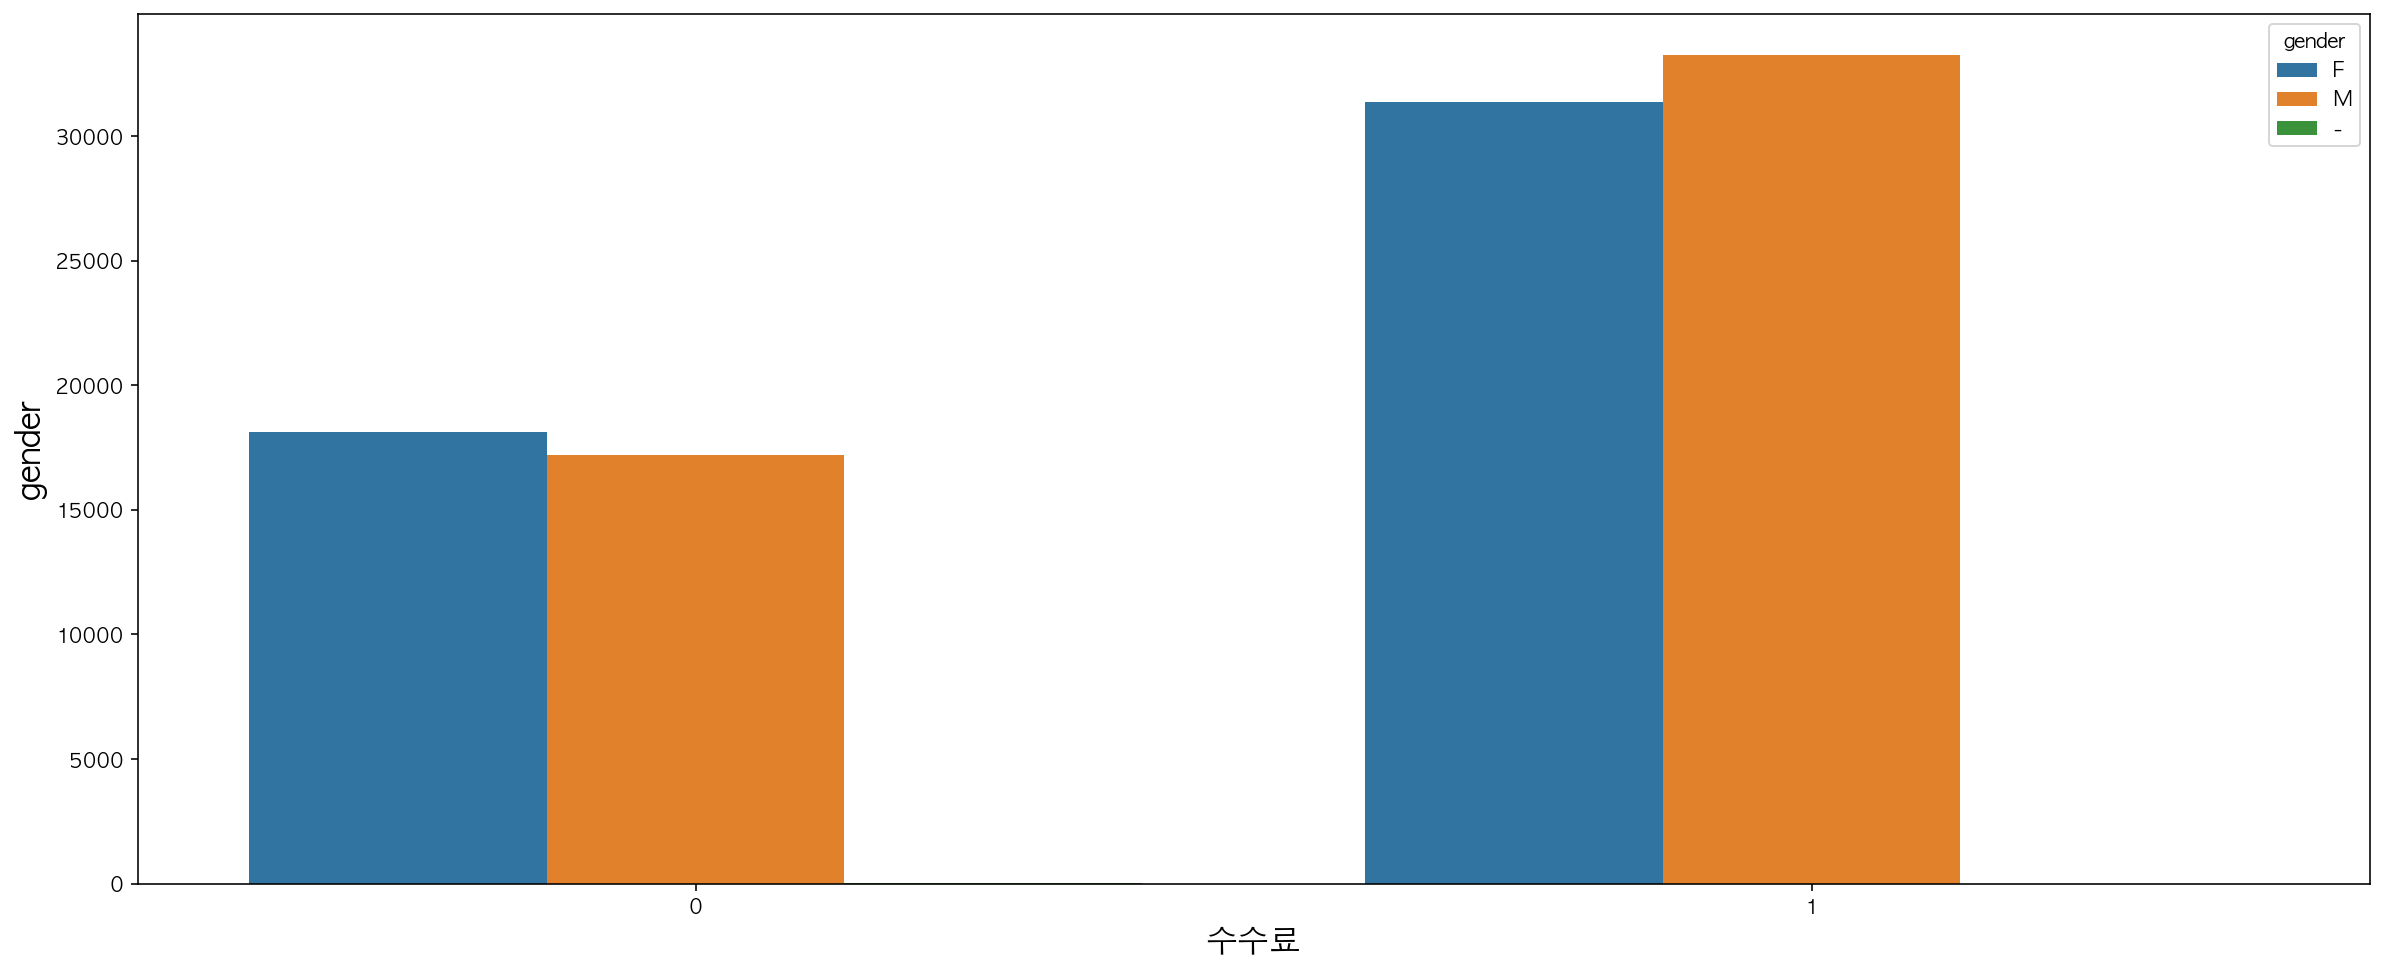

In [ ]:
# 여성 비율이 서비스를 이용하지 않은 경우가 남성 비율에 비해 많다.,
fig = plt.figure(figsize=(20,8))
sns.countplot(x="has_paid",data=df,hue="gender")
plt.ylabel("gender", fontsize=16)
plt.xlabel("수수료", fontsize=16)

In [ ]:
data_gender_count = df.groupby(['gender']).sum()
data_gender_count

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%),나이대,income_근로_tf,income_사업_tf,income_기타_tf
gender,,,,,,,,,,,,,
-,661,44378,5364000,163500,4,0,0,0,65.09,560,0,0,0
F,1447503,99897734,9726221000,336189600,31387,116554376000,53596946000,6616006000,167548.91,1226140,19798,39035,11805
M,1451932,101869018,11082639000,388411000,33252,145837687000,64659761000,9456513000,175514.38,1215920,20094,39135,13307
